<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Clustering problems
- $k$-means clustering

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



### Unsupervised Learning

Unsupervised learning is a type of machine learning in which the algorithm is not provided with any pre-assigned labels or scores for the training data

>$\displaystyle T = \big\{ (x_i) \big\}$  where $x_i\in \mathbb{R}^d$ are feature sets 

- PCA looks to find a low-dimensional representation of the observations that explain a good fraction of the variance;

<img src='files/PCAonSNP.png' width=600 align=left>

## Clustering is ...
<img src="files/clusters.png" align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<!--<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left /> -->

Populating the interactive namespace from numpy and matplotlib


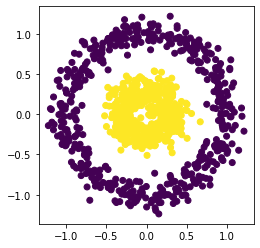

In [1]:
%pylab inline
from sklearn import datasets

# Generate concentric classes
x, y = datasets.make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=2018)
plt.subplot(111, aspect='equal'); 
plt.scatter(x[:,0], x[:,1], c=y);

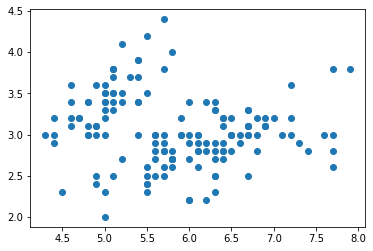

In [2]:
# iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2]  # only the first 2 features

scatter(X[:,0],X[:,1]);

## Types of Algorithms

- Flat

>1. Start with a random partitioning
>2. Iterate to improve the grouping

- Hierarchical

>1. Greedy grouping of closest: bottom up
>2. Greedy splitting of farthest: top down

### Flat example

<img src=files/kmeans.gif>
<!--
<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300> -->

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm


### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$
><br>
><br>
>$\displaystyle  \hat{{C}} = \textrm{arg}\min_{{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ \lvert\!\lvert x-\mu_i\rvert\!\rvert^2 \right] $   (distortion measure)
><br>
><br>
> where 
><br>
><br>
>$\displaystyle  \mu_i = \frac{1}{\lvert{C_i}\rvert}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>1. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

### Animation

<!--<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif align=left width=300>-->
<img src=files/kmeans.gif align=left width=300>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

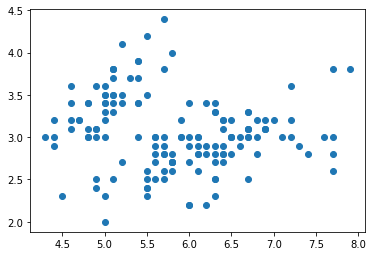

In [3]:
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1]);

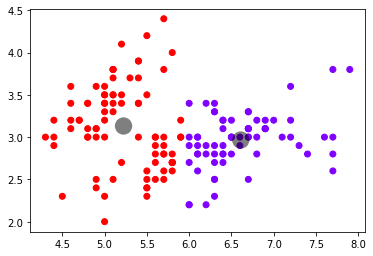

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

In [5]:
def clustering_map(X,cluster,i=0,j=1,h=0.005):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
    # Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Obtain labels for each point in mesh. Use last trained model.
    cluster.fit(X)
    Z = cluster.predict(grid)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    
    # Plot the training points
    plt.scatter(X[:,i], X[:,j], cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clustering with "+str(cluster))

    ax=plt.gca()
    ax.legend(["training data"],loc=0,fontsize=8)
    
    # Plot the centroids as a white X
    centroids = cluster.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)
    
    return fig

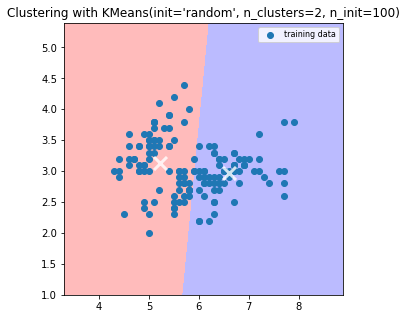

In [6]:
clustering_map(X,kmeans)
plt.show()

## Detour: Voronoi Tessellation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/1200px-Euclidean_Voronoi_diagram.svg.png" alt="Euclidean Voronoi diagram.svg" align=left width=400>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

<img src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" alt="k-means algorithm" align=left width=400>

### k-means++

- Choose one center $\mu_1$ uniformly at random among the data points.
- For each data point $x$ not chosen yet, compute $D(x)$, the distance between $x$ and the nearest center $\mu_i$   that has already been chosen.
- Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to $D(x)^2$.
- Repeat Steps 2 and 3 until $k$ centers have been chosen.
- Now that the initial centers have been chosen, proceed using standard k-means clustering.

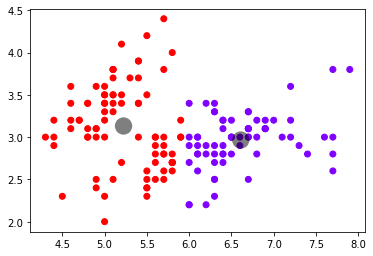

In [7]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(X)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

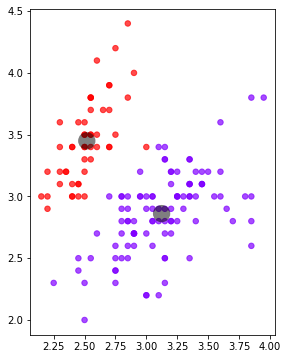

In [8]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5

kmeans = KMeans(n_clusters=2, n_init=100, init='random') #init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

In [9]:
kmeans.inertia_

30.063975000000013

In [10]:
kmeans.score(Z)

-30.063975

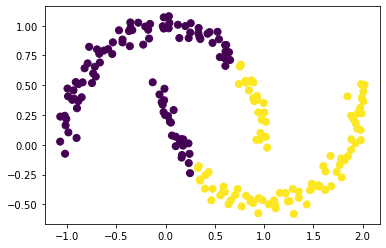

In [11]:
# k-means is limited to linear cluster boundaries
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- kernel transformation, spectral clustering

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? elbow method, silhouette coefficient, etc. <br/>
> Characterize the clusters - Gaussian? spherical?



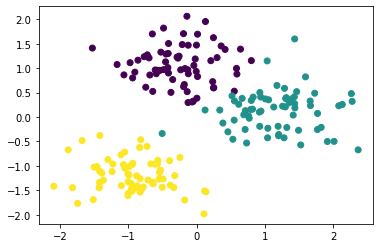

In [12]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 100 not perfectly separable points
X, y = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y);

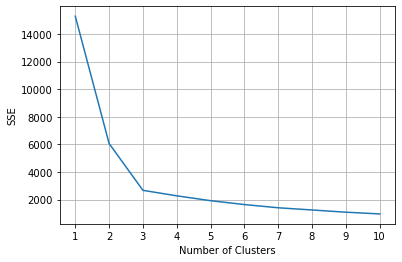

In [13]:
sse = [] # A list holds the SSE values for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

- Elbow Method
>
>Select the value of $k$ at the elbow, i.e., the point after which the minimum of distortion value starts to decrease slowly.

In [14]:
# %pip install kneed

In [15]:
from kneed import KneeLocator
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

- Silhouette Method: [silhouette coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) values range between -1 and 1 and quantifies how well a data point fits into its assigned cluster based on two factors:

> How close the data point is to other points in the cluster
>
> How far away the data point is from points in other clusters

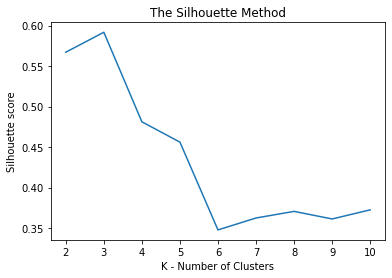

In [16]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
    
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Lineplot using silhouette score
plt.plot(range(2, 11), silhouette_scores) 
plt.xlabel('K - Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('The Silhouette Method') 
plt.show()

## Exercise

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200, 3)

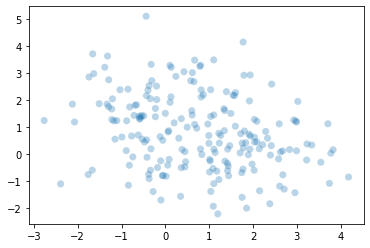

In [17]:
X = loadtxt('files/Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

## $k$-medians clustering

Replace mean with median for cluster centers <br>
Also, Euclidean ($L_2$) vs Taxicab ($L_1$) distance 